# **Problem Statement**
In an increasingly dynamic financial landscape, XYZ Financial Services, a leading commercial bank, faces the critical challenge of accurately predicting credit risk. The goal of this project is to develop a predictive model that estimates the probability of credit default based on credit card owners' characteristics, such as age, gender, education, marital status, credit limit, and payment history. By accurately predicting default probabilities, XYZ Financial Services can make informed lending decisions, optimize risk management strategies, and enhance financial stability.

## **Dataset Information**
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

- **Dataset Name and Source**
    - **Name:** UCI_Credit_Card.csv
    - **Source:** This dataset is originally from the UCI Machine Learning Repository. ([Dataset source link](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset))
    - **Number of Instances (Rows):** 30,000
    - **Number of Attributes (Columns):** 25

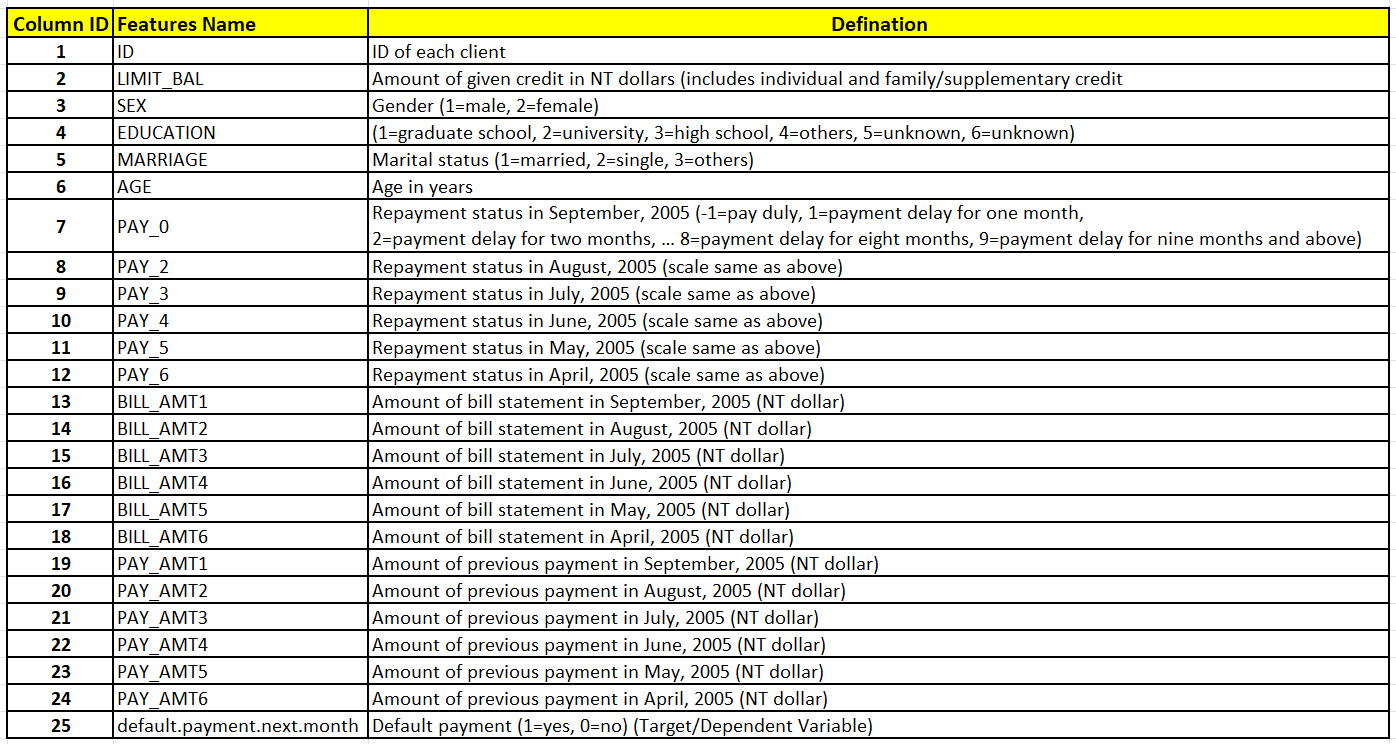

In [30]:
# Displaying all features information
import os
from IPython.display import Image

data_dir = "datasets"
image_path = os.path.join(data_dir, "Dataset Information.png")
Image(filename=image_path)

## **Target Variable**
- **default.payment.next.month**: A binary variable indicating whether a credit card owner will default on their payment in the next month (1 = default, 0 = no default), as provided in the UCI Credit Card dataset.

## **Requirements**
- **Binary Classification**: The model should classify credit card clients into two categories: those who will default on their payment in the next month and those who will not.
- **Performance Metrics**: The model's performance should be evaluated using appropriate metrics for binary classification, such as Accuracy, Precision, Recall, F1-Score, ROC-AUC, and Confusion Matrix, to ensure a comprehensive understanding of its effectiveness in identifying defaults while minimizing false negatives.
- **Business Goal**: The predictions should enable XYZ Financial Services to identify high-risk credit clients and tailor risk mitigation strategies, such as adjusting credit limits or offering targeted financial counseling, to reduce default rates and improve portfolio health.

In [31]:
# Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# **1. Data Exploration**

## **1.1 Loading the Dataset**

In [32]:
# Defining the path to the datasets folder
dataset_path = os.path.join(data_dir, "UCI_Credit_Card.csv")

# Loading the CSV file into a DataFrame
df = pd.read_csv(dataset_path)

# Displaying the first few rows to confirm loading
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## **1.2 Inspecting Dataset Structure**

In [33]:
# Checking the number of rows and columns
df.shape

(30000, 25)

- The dataset is correctly loaded and contains 30,000 rows and 25 columns which exactly matches the expected dimensions given in the dataset information.

In [34]:
# Checking column names
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

- All the column names are displayed correctly, and they match the expected names from the dataset information.

In [35]:
# Checking data types of each column
df.dtypes

ID                              int64
LIMIT_BAL                     float64
SEX                             int64
EDUCATION                       int64
MARRIAGE                        int64
AGE                             int64
PAY_0                           int64
PAY_2                           int64
PAY_3                           int64
PAY_4                           int64
PAY_5                           int64
PAY_6                           int64
BILL_AMT1                     float64
BILL_AMT2                     float64
BILL_AMT3                     float64
BILL_AMT4                     float64
BILL_AMT5                     float64
BILL_AMT6                     float64
PAY_AMT1                      float64
PAY_AMT2                      float64
PAY_AMT3                      float64
PAY_AMT4                      float64
PAY_AMT5                      float64
PAY_AMT6                      float64
default.payment.next.month      int64
dtype: object

- All columns have the correct data types as expected from the dataset information, with no discrepancies in data types.

In [36]:
# Displaying DataFrame summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

- All the columns have 30,000 non-null values, indicating that there are no missing values in the dataset.
- The dataset have 13 float64 columns, 12 int64 columns, which is consistent with the expected data types for the given attributes.

In [37]:
# Checking for duplicates
df.duplicated().sum()

0

- There are no duplicate rows in the dataset, ensuring the integrity of the data for analysis.

### **Key observations from Inspecting Dataset**
Based on the dataset and inspected structure:

- **Rows**: 30,000 credit card clients.
- **Columns**: 25, including Target variable `default.payment.next.month`.
- **Data Types**: Mostly int64 for categorical/ordinal and float64 for monetary values.
- **Missing Values**: None, all columns have 30,000 non-null values.
- **Duplicate Rows**: None, ensuring data integrity.

## **1.3 Understanding Variables**

In [38]:
# Renaming Columns names for clarity and consistency
column_renames = {
    'ID': 'ID',
    'LIMIT_BAL': 'Credit_Limit',
    'SEX': 'Gender',
    'EDUCATION': 'Education_Level',
    'MARRIAGE': 'Marital_Status',
    'AGE': 'Age',
    'PAY_0': 'Sept_Pay',
    'PAY_2': 'Aug_Pay',
    'PAY_3': 'July_Pay',
    'PAY_4': 'June_Pay',
    'PAY_5': 'May_Pay',
    'PAY_6': 'Apr_Pay',
    'BILL_AMT1': 'Sept_Bill_Amt',
    'BILL_AMT2': 'Aug_Bill_Amt',
    'BILL_AMT3': 'July_Bill_Amt',
    'BILL_AMT4': 'June_Bill_Amt',
    'BILL_AMT5': 'May_Bill_Amt',
    'BILL_AMT6': 'Apr_Bill_Amt',
    'PAY_AMT1': 'Sept_Pay_Amt',
    'PAY_AMT2': 'Aug_Pay_Amt',
    'PAY_AMT3': 'July_Pay_Amt',
    'PAY_AMT4': 'June_Pay_Amt',
    'PAY_AMT5': 'May_Pay_Amt',
    'PAY_AMT6': 'Apr_Pay_Amt',
    'default.payment.next.month': 'default_payment_next_month'
}

# Renaming the columns in the DataFrame
df = df.rename(columns=column_renames)

# Verifying the new column names
df.columns

Index(['ID', 'Credit_Limit', 'Gender', 'Education_Level', 'Marital_Status',
       'Age', 'Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay',
       'Apr_Pay', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt',
       'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt',
       'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt',
       'Apr_Pay_Amt', 'default_payment_next_month'],
      dtype='object')

In [39]:
# Displaying random 10 rows
df.sample(10)

,ID,Credit_Limit,Gender,Education_Level,Marital_Status,Age,Sept_Pay,Aug_Pay,July_Pay,June_Pay,...,June_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,July_Pay_Amt,June_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,default_payment_next_month
16039,16040,200000.0,2,2,1,31,3,2,2,2,...,5000.0,5000.0,5000.0,0.0,0.0,0.0,0.0,0.0,0.0,1
28247,28248,30000.0,2,2,1,32,0,0,-2,-2,...,-2.0,708.0,940.0,0.0,0.0,0.0,710.0,1042.0,0.0,0
19677,19678,230000.0,2,1,1,41,0,0,0,0,...,34039.0,26622.0,11891.0,1528.0,1538.0,1777.0,1160.0,1500.0,1000.0,0
3298,3299,230000.0,2,2,2,26,-1,-1,-1,4,...,600.0,300.0,150.0,0.0,600.0,0.0,0.0,0.0,686.0,1
14356,14357,180000.0,1,2,2,34,0,0,0,0,...,78024.0,72989.0,75454.0,6949.0,6502.0,3022.0,3000.0,3022.0,2000.0,0
22043,22044,150000.0,2,1,2,24,0,0,0,0,...,17281.0,18576.0,18783.0,4000.0,2000.0,2000.0,2000.0,2000.0,3000.0,0
29642,29643,110000.0,1,1,2,29,2,0,0,0,...,86309.0,84028.0,86114.0,3430.0,4000.0,7100.0,0.0,3600.0,3142.0,1
29342,29343,30000.0,1,2,2,24,1,2,2,2,...,22798.0,24420.0,23889.0,1700.0,1300.0,0.0,2000.0,0.0,2001.0,1
11995,11996,180000.0,1,1,2,28,-1,-1,-1,-1,...,1134.0,1313.0,1332.0,1839.0,2544.0,1134.0,1313.0,1332.0,2444.0,1
29683,29684,230000.0,1,1,2,31,-2,-2,-2,-2,...,0.0,100.0,2405.0,0.0,0.0,0.0,100.0,2405.0,0.0,0


- **ID**: Unique identifier (we will not use for modeling).
- **Credit_Limit**: Credit limit (continuous, float64).
- **Gender, Education_Level, Marital_Status**: Categorical variables encoded as integers.
- **Age**: Continuous, integer.
- **Sept_Pay to Apr_Pay**: Payment status (ordinal, e.g., -1, 0, 1, 2 indicating months of delay or paid).
- **Sept_Bill_Amt to Apr_Bill_Amt**: Bill amounts for six months (float64).
- **Sept_Pay_Amt to Apr_Pay_Amt**: Payment amounts for six months (float64).
- **default_payment_next_month**: Target variable (0 = no default, 1 = default, int64).

In [40]:
# Defining categorical columns based on dataset information
categorical_columns = ['Gender', 'Education_Level', 'Marital_Status', 'Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'Apr_Pay', 'default_payment_next_month']

# Displaying unique values in each categorical column
for col in categorical_columns:
    print(f"{col}: {df[col].unique().tolist()}")

Gender: [2, 1]
Education_Level: [2, 1, 3, 5, 4, 6, 0]
Marital_Status: [1, 2, 3, 0]
Sept_Pay: [2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6]
Aug_Pay: [2, 0, -1, -2, 3, 5, 7, 4, 1, 6, 8]
July_Pay: [-1, 0, 2, -2, 3, 4, 6, 7, 1, 5, 8]
June_Pay: [-1, 0, -2, 2, 3, 4, 5, 7, 6, 1, 8]
May_Pay: [-2, 0, -1, 2, 3, 5, 4, 7, 8, 6]
Apr_Pay: [-2, 2, 0, -1, 3, 6, 4, 7, 8, 5]
default_payment_next_month: [1, 0]


- Education_Level has unexpected value (0) that may need cleaning.
- Marital_Status includes 0, which may represent missing or undefined status.
- Sept_Pay to Apr_Pay columns include values like -2 and 0, which may need clarification. As it is not defined in the dataset information.

In [41]:
# Define numerical columns
numerical_columns = ['Credit_Limit', 'Age', 'Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt', 'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt', 'Sept_Pay_Amt', 'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt', 'Apr_Pay_Amt']

# Display summary statistics for numerical variables
df[numerical_columns].describe().astype(int)

,Credit_Limit,Age,Sept_Bill_Amt,Aug_Bill_Amt,July_Bill_Amt,June_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,July_Pay_Amt,June_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
mean,167484,35,51223,49179,47013,43262,40311,38871,5663,5921,5225,4826,4799,5215
std,129747,9,73635,71173,69349,64332,60797,59554,16563,23040,17606,15666,15278,17777
min,10000,21,-165580,-69777,-157264,-170000,-81334,-339603,0,0,0,0,0,0
25%,50000,28,3558,2984,2666,2326,1763,1256,1000,833,390,296,252,117
50%,140000,34,22381,21200,20088,19052,18104,17071,2100,2009,1800,1500,1500,1500
75%,240000,41,67091,64006,60164,54506,50190,49198,5006,5000,4505,4013,4031,4000
max,1000000,79,964511,983931,1664089,891586,927171,961664,873552,1684259,896040,621000,426529,528666


- Credit_Limit ranges from 10,000 to 1,000,000 NTD, indicating a wide range of credit limits.
- Age ranges from 21 to 79, which is reasonable.
- Sept_Bill_Amt to Apr_Bill_Amt can be negative (overpayments) or very large (high credit usage).
- Sept_Pay_Amt to Apr_Pay_Amt include zero (no payment) and large values, suggesting varied payment behaviors.

In [42]:
# Defining target column
target_column = 'default_payment_next_month'

# Displaying the distribution of the target variable
df[target_column].value_counts(normalize=True) * 100

default_payment_next_month
0    77.88
1    22.12
Name: proportion, dtype: float64

- default_payment_next_month (target variable) is imbalanced with 77.88% 0s and 22.12% 1s, suggesting a need for handling imbalance later.

### **Key Observations from Understanding Variables**
- **Variable Overview**:
    - **ID**: Unique identifier (we will not use for modeling).
    - **Credit_Limit**: Credit limit (continuous, float64).
    - **Gender, Education_Level, Marital_Status**: Categorical variables encoded as integers.
    - **Age**: Continuous, integer.
    - **Sept_Pay to Apr_Pay**: Payment status (ordinal, e.g., -1, 0, 1, 2 indicating months of delay or paid).
    - **Sept_Bill_Amt to Apr_Bill_Amt**: Bill amounts for six months (float64).
    - **Sept_Pay_Amt to Apr_Pay_Amt**: Payment amounts for six months (float64).
    - **default_payment_next_month**: Target variable (0 = no default, 1 = default, int64).

- **Categorical Variables**: 
    - Education_Level has unexpected value 0 that may need cleaning.
    - Marital_Status includes 0, which may represent missing or undefined status.
    - Sept_Pay to Apr_Pay columns include values like -2 and 0, which may need clarification. As it is not defined in the dataset information.
- **Numerical Variables**:
    - Credit_Limit ranges from 10,000 to 1,000,000 NTD, indicating a wide range of credit limits.
    - Age ranges from 21 to 79, which is reasonable.
    - Sept_Bill_Amt to Apr_Bill_Amt can be negative (overpayments) or very large (high credit usage).
    - Sept_Pay_Amt to Apr_Pay_Amt include zero (no payment) and large values, suggesting varied payment behaviors.
- **Target Variable**:
    - default_payment_next_month (target variable) is imbalanced with 77.88% 0s and 22.12% 1s, suggesting a need for handling imbalance later.

## **1.4 Check Data Quality**

In [43]:
# Checking percentage of missing values
print((df.isnull().sum() / len(df)) * 100)

ID                            0.0
Credit_Limit                  0.0
Gender                        0.0
Education_Level               0.0
Marital_Status                0.0
Age                           0.0
Sept_Pay                      0.0
Aug_Pay                       0.0
July_Pay                      0.0
June_Pay                      0.0
May_Pay                       0.0
Apr_Pay                       0.0
Sept_Bill_Amt                 0.0
Aug_Bill_Amt                  0.0
July_Bill_Amt                 0.0
June_Bill_Amt                 0.0
May_Bill_Amt                  0.0
Apr_Bill_Amt                  0.0
Sept_Pay_Amt                  0.0
Aug_Pay_Amt                   0.0
July_Pay_Amt                  0.0
June_Pay_Amt                  0.0
May_Pay_Amt                   0.0
Apr_Pay_Amt                   0.0
default_payment_next_month    0.0
dtype: float64


- The dataset looks complete, as there are no missing values.But there are some potential data quality issues to address which we found during understanding variables:
    - **Education_Level**: Contains an unexpected value (0) that may indicate missing or unknown education level.
    - **Marital_Status**: Includes 0, which may represent missing or undefined status.
    - **Payment Status Columns (Sept_Pay to Apr_Pay)**: Include values like -2, which may represent missing or undefined status.
- We will need to clean these columns to ensure accurate modeling.

In [44]:
# Checking for Inconsistencies in Categorical Variables
for col in categorical_columns:
    unique_values = sorted(df[col].unique())
    expected_values = {
        'Gender': [1, 2],
        'Education_Level': [1, 2, 3, 4, 5, 6],
        'Marital_Status': [1, 2, 3],
        'Sept_Pay': [-1,1,2,3,4,5,6,7,8,9],
        'Aug_Pay': [-1,1,2,3,4,5,6,7,8,9],
        'July_Pay': [-1,1,2,3,4,5,6,7,8,9],
        'June_Pay': [-1,1,2,3,4,5,6,7,8,9],
        'May_Pay': [-1,1,2,3,4,5,6,7,8,9],
        'Apr_Pay': [-1,1,2,3,4,5,6,7,8,9],
        'default_payment_next_month': [0, 1]
    }

    unexpected = [x for x in unique_values if x not in expected_values[col]]
    if unexpected:
        print(f"{col}: Unexpected values:")
        for value in unexpected:
            value_count = df[df[col] == value].shape[0]
            print(f"  Value {value}: Count = {value_count}")
        print()

Education_Level: Unexpected values:
  Value 0: Count = 14

Marital_Status: Unexpected values:
  Value 0: Count = 54

Sept_Pay: Unexpected values:
  Value -2: Count = 2759
  Value 0: Count = 14737

Aug_Pay: Unexpected values:
  Value -2: Count = 3782
  Value 0: Count = 15730

July_Pay: Unexpected values:
  Value -2: Count = 4085
  Value 0: Count = 15764

June_Pay: Unexpected values:
  Value -2: Count = 4348
  Value 0: Count = 16455

May_Pay: Unexpected values:
  Value -2: Count = 4546
  Value 0: Count = 16947

Apr_Pay: Unexpected values:
  Value -2: Count = 4895
  Value 0: Count = 16286



- **Education_Level:**
    - Education levels have 14 `0` values, which is unexpected and may indicate missing or unknown education level.
- **Marital_Status:**
    - Marital status includes 54 `0` values, which may represent missing or undefined status.
- **APR_PAY to SEPT_PAY:**
    - Payment status columns (Sept_Pay to Apr_Pay) include around 4000 `-2` values on an average, As all payment status columns have `-2` values in big numbers, we can assume that these values represent "no consumption" or "no credit usage" for those months, which is a common extension in this dataset.
    - Payment status columns (Sept_Pay to Apr_Pay) include around 16000 `0` values on an average, As all payment status columns have `0` values in big numbers, we can assume that these values represent "no payment required" for no credit usage for those months.

In [45]:
# Detecting Outliers in Numerical Variables

# Function to detect outliers using IQR
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]
    return len(outliers), lower_bound, upper_bound

# Checking for outliers in each numerical column
for col in numerical_columns:
    outlier_count, lower, upper = detect_outliers(df, col)
    total_count = len(df[col])
    outlier_percentage = (outlier_count / total_count) * 100
    print(f"\n{col}: {outlier_count} outliers ({outlier_percentage:.2f}%) \n[Lower bound: {round(lower)}, Upper bound: {round(upper)}]")


Credit_Limit: 167 outliers (0.56%) 
[Lower bound: -235000, Upper bound: 525000]

Age: 272 outliers (0.91%) 
[Lower bound: 8, Upper bound: 60]

Sept_Bill_Amt: 2400 outliers (8.00%) 
[Lower bound: -91740, Upper bound: 162389]

Aug_Bill_Amt: 2395 outliers (7.98%) 
[Lower bound: -88548, Upper bound: 155538]

July_Bill_Amt: 2469 outliers (8.23%) 
[Lower bound: -83582, Upper bound: 146412]

June_Bill_Amt: 2622 outliers (8.74%) 
[Lower bound: -75942, Upper bound: 132775]

May_Bill_Amt: 2725 outliers (9.08%) 
[Lower bound: -70878, Upper bound: 122832]

Apr_Bill_Amt: 2693 outliers (8.98%) 
[Lower bound: -70657, Upper bound: 121112]

Sept_Pay_Amt: 2745 outliers (9.15%) 
[Lower bound: -5009, Upper bound: 11015]

Aug_Pay_Amt: 2714 outliers (9.05%) 
[Lower bound: -5418, Upper bound: 11250]

July_Pay_Amt: 2598 outliers (8.66%) 
[Lower bound: -5782, Upper bound: 10678]

June_Pay_Amt: 2994 outliers (9.98%) 
[Lower bound: -5280, Upper bound: 9589]

May_Pay_Amt: 2945 outliers (9.82%) 
[Lower bound: -54

- **Low Outlier Percentages:** Credit_Limit (0.56%) and Age (0.91%) have minimal outliers, suggesting good data integrity overall.
- **High Outlier Percentages:** BILL_AMT (8–9%) and PAY_AMT (8.66–9.98%) have significant outliers, reflecting the dataset’s natural variability in credit usage and payments.
- **Negative Values:**
    - Negative BILL_AMT outliers are valid (overpayments).
- **AGE Outliers:** Values above 60.50 are likely fine.
- **Action Items:**
    - We will decide whether to cap, remove, or retain other outliers based on domain knowledge.

### **Assumptions for this Project**
- Based on these assumptions, we will clean and analyze the dataset accordingly.
    - Assuming `0` in Marital_Status represents missing values.
    - Assuming `0` in Education_Level represents unknown (missing values).
    - Assuming (`5` and `6`) values in Education_Level both are same and not a typing error in the dataset documentation as both are (unknown) according to the documentation. So we will replace `6` in Education_Level with `5`(unknown).
    - Assuming `-2` in Payment Status columns represent "no consumption" or "no credit usage" for those months.
    - Assuming `0` in Payment Status columns represent "paid on time" with 0 months of delay.

### **Key Insights from Data Quality Check**
- **Missing Values:** 
    - Education_Level and Marital_Status have missing values which need to be addressed.
- **Update Expected Ranges:**
    - In Apr_Pay to Sept_Pay (value `-2`) is valid (no consumption) we can update expected ranges.
    - In Apr_Pay to Sept_Pay (value `0`) is valid (paid on time) we can update expected ranges.
    - In Education_Level, we will replace `6` with `5` (unknown) to maintain consistency.
- **Outliers:** 
    - Bill_Amt and Pay_Amt have high outlier percentages; Credit_Limit and Age have low outlier percentages.
- **Action Items:** 
    - Handle missing values in Education_Level and Marital_Status in the Data Cleaning phase.
    - Handle Bill_Amt and Pay_Amt outliers in the Data Cleaning phase.

## **Summary of Data Exploration**
- **Dataset Overview:**
    - The dataset contains records of 30,000 credit card clients with 25 attributes, including demographic information, credit history, payment behavior and the target variable (default_payment_next_month) indicates whether a client will default on their payment in the next month. our dataset is well-structured with no missing values, duplicate rows, or incorrect data types ensuring data integrity for analysis and modeling.
- **Variable Understanding:**
    - The dataset includes a mix of categorical, ordinal, and continuous variables, with some unexpected values in categorical variables such as Education Level and Marital Status that have 0 values indicating missing or unknown status and Payment Status columns (Sept_Pay to Apr_Pay) that have -2 and 0 values indicating "no consumption" or "no payment required for no credit usage" respectively that needs to be handled.
    - The target variable (default_payment_next_month) is imbalanced with 77.88% 0 (no default) and 22.12% 1(default), suggesting a need for handling imbalance for modeling.
    - We have renamed the columns names such as changing "PAY_0" to "Sept_Pay", and "BILL_AMT1" to "Sept_Bill_Amt" based on dataset information to make them more interpretable.
- **Data Quality Check:**
    - The dataset looks complete, as there are no missing values. But there are some potential data quality issues to address which we found during understanding variables:
        - Education Level has unexpected value (0) that may indicate missing or unknown education level.
        - Marital Status includes 0, which may represent missing or undefined status.
        - Payment Status columns (Sept_Pay to Apr_Pay) include values like -2, which may represent missing or undefined status.
        - In Education Level both values 5 and 6 are marked as (unknown) according to the dataset documentation, so we will replace 6 with 5 to maintain consistency.
    - Bill Amounts (BILL_AMT) and Payment Amounts (PAY_AMT) have high outlier percentages, while Credit Limit and Age have low outlier percentages which need to be handled or we should use tree-based models that are robust to outliers.
    - We will need to clean these columns to ensure accurate modeling.
- **Assumptions:**
    - We have made some assumptions based on the dataset information and domain knowledge, such as assuming 0 in Marital_Status represents missing values, 0 in Education_Level represents unknown (missing values), -2 in Payment Status columns represent "no consumption" or "no credit usage" for those months, and 0 in Payment Status columns represent "paid on time" with 0 months of delay.


# **2. Data Cleaning**

## **2.1 Handling Missing Values**
- We will handle the following data cleaning tasks based on the observations and assumptions from the data exploration phase:

In [46]:
#Handling missing values in Education_Level and Marital_Status
print(f"Count of 0 values in Education_Level: {len(df[df['Education_Level'] == 0])}")
print(f"Count of 0 values in Marital_Status: {len(df[df['Marital_Status'] == 0])}")

Count of 0 values in Education_Level: 14
Count of 0 values in Marital_Status: 54


- Missing values are very less so we will handle them by replacing them with appropriate values:
    - **Education_Level**: Replace 0 with 5 (unknown).
    - **Marital_Status**: Replace 0 with the mode of Marital_Status.

In [47]:
# Calculating mode for Marital_Status
marital_mode = df['Marital_Status'].mode()[0]
print(f"\nMode of Marital_Status: {marital_mode}")

# Replacing 0s in Marital_Status with mode
df['Marital_Status'] = df['Marital_Status'].replace(0, marital_mode)

# Replacing 0s in Education_Level with 5 (unknown)
df['Education_Level'] = df['Education_Level'].replace(0, 5)

# Verifying correction
print("\nCount of 0 values after handling:")
print(f"Education_Level: {len(df[df['Education_Level'] == 0])}")
print(f"Marital_Status: {len(df[df['Marital_Status'] == 0])}")


Mode of Marital_Status: 2

Count of 0 values after handling:
Education_Level: 0
Marital_Status: 0


- We replaced 0s in Education_Level with 5(unknown).
- We replaced 0s in Marital_Status with the mode.

## **2.2 Handling Inconsistencies in Categorical Variables**


In [48]:
# Display counts (5,6) unknown in Education_Level
print(f"Education_Level 5: {len(df[df['Education_Level'] == 5])}")
print(f"Education_Level 6: {len(df[df['Education_Level'] == 6])}")

# Replacing 6 in Education_Level with 5 (unknown)
df['Education_Level'] = df['Education_Level'].replace(6, 5)

# Display the updated counts
print(f"Updated Education_Level 5: {len(df[df['Education_Level'] == 5])}")
print(f"Updated Education_Level 6: {len(df[df['Education_Level'] == 6])}")

Education_Level 5: 294
Education_Level 6: 51
Updated Education_Level 5: 345
Updated Education_Level 6: 0


- We replaced 6(unknown) in Education_Level with 5(unknown) as both are (unknown) according to the documentation and as per our assumption to maintain consistency.

In [49]:
# Expected value ranges based on documentation and assumptions
expected_ranges = {
    'Gender': [1, 2],
    'Education_Level': [1, 2, 3, 4, 5],
    'Marital_Status': [1, 2, 3],
    'Sept_Pay': list(range(-2, 10)),
    'Aug_Pay': list(range(-2, 10)),
    'July_Pay': list(range(-2, 10)),
    'June_Pay': list(range(-2, 10)),
    'May_Pay': list(range(-2, 10)),
    'Apr_Pay': list(range(-2, 10)),
    'default_payment_next_month': [0, 1]
}

# Checking for unexpected values
print("Checking for inconsistencies in categorical variables:")
for col in categorical_columns:
    unique_values = df[col].unique()
    unexpected = [x for x in unique_values if x not in expected_ranges[col]]
    if unexpected:
        print(f"{col}: Unexpected values found - {unexpected}")
        print(f"Count of unexpected values: {len(df[df[col].isin(unexpected)])}")
    else:
        print(f"{col}: All values within expected ranges.")

Checking for inconsistencies in categorical variables:
Gender: All values within expected ranges.
Education_Level: All values within expected ranges.
Marital_Status: All values within expected ranges.
Sept_Pay: All values within expected ranges.
Aug_Pay: All values within expected ranges.
July_Pay: All values within expected ranges.
June_Pay: All values within expected ranges.
May_Pay: All values within expected ranges.
Apr_Pay: All values within expected ranges.
default_payment_next_month: All values within expected ranges.


- All values are within expected ranges based on the documentation and assumptions.

## **2.3 Handling Outliers**

In [50]:
# Removing outliers in numerical variables

# Creating a copy if df to avoid modifying the original DataFrame
df1 = df.copy()

for col in numerical_columns:
    outlier_count, lower, upper = detect_outliers(df1, col)
    df1 = df1[(df1[col] >= lower) & (df1[col] <= upper)]
df1.reset_index(drop=True, inplace=True)

# Printing the shape of df1 after removing outliers
df1.shape

(14466, 25)

- If we remove outliers, we will lose more than 50% of the data, so we will not remove outliers. Instead, we can apply log transformation for skewed numerical variables or use tree-based models which are robust to skewed distributions and outliers.

In [51]:
# Droping the ID column as it is not a feature
df.drop(columns='ID', inplace=True)

# Saving the cleaned DataFrame to a new CSV file
cleaned_data_path = os.path.join(data_dir, "Cleaned_data.csv")
df.to_csv(cleaned_data_path, index=False)

## **Summary of Data Cleaning**
- **Missing Values**: 
    - We handled missing values 0s in Education_Level and Marital_Status by replacing them with 5 (unknown) and the mode respectively.
- **Handling Outliers**:
    - We decided not to remove outliers as it would result in losing more than 50% of the data. Instead, we can apply log transformation for skewed numerical variables or use tree-based models which are robust to skewed distributions and outliers.
- **Inconsistencies**:
    - We replaced 6(unknown) in Education_Level with 5(unknown) as both are (unknown) according to the documentation and as per our assumption to maintain consistency.
- **Data Integrity**:
    - The dataset is now cleaned and ready for analysis, with no missing values, inconsistencies, or unexpected values in categorical variables.

# **3. Data Visualization**

In [52]:
# Loading the cleaned DataFrame
df = pd.read_csv(cleaned_data_path)

# Createing output directory to save all the visualizations
visualization_outputs = os.path.join(os.getcwd(), "visualization_outputs")
os.makedirs(visualization_outputs, exist_ok=True)

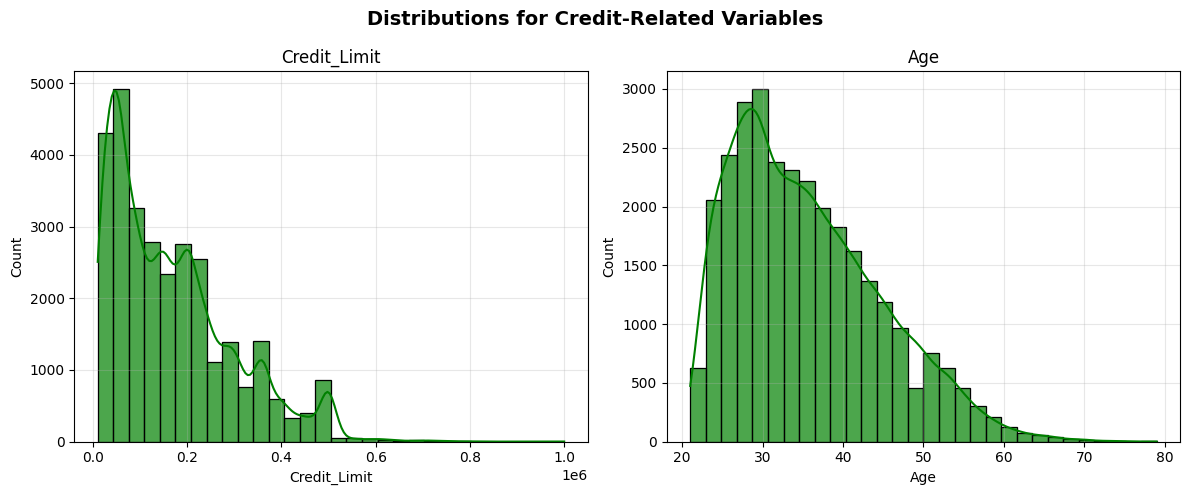

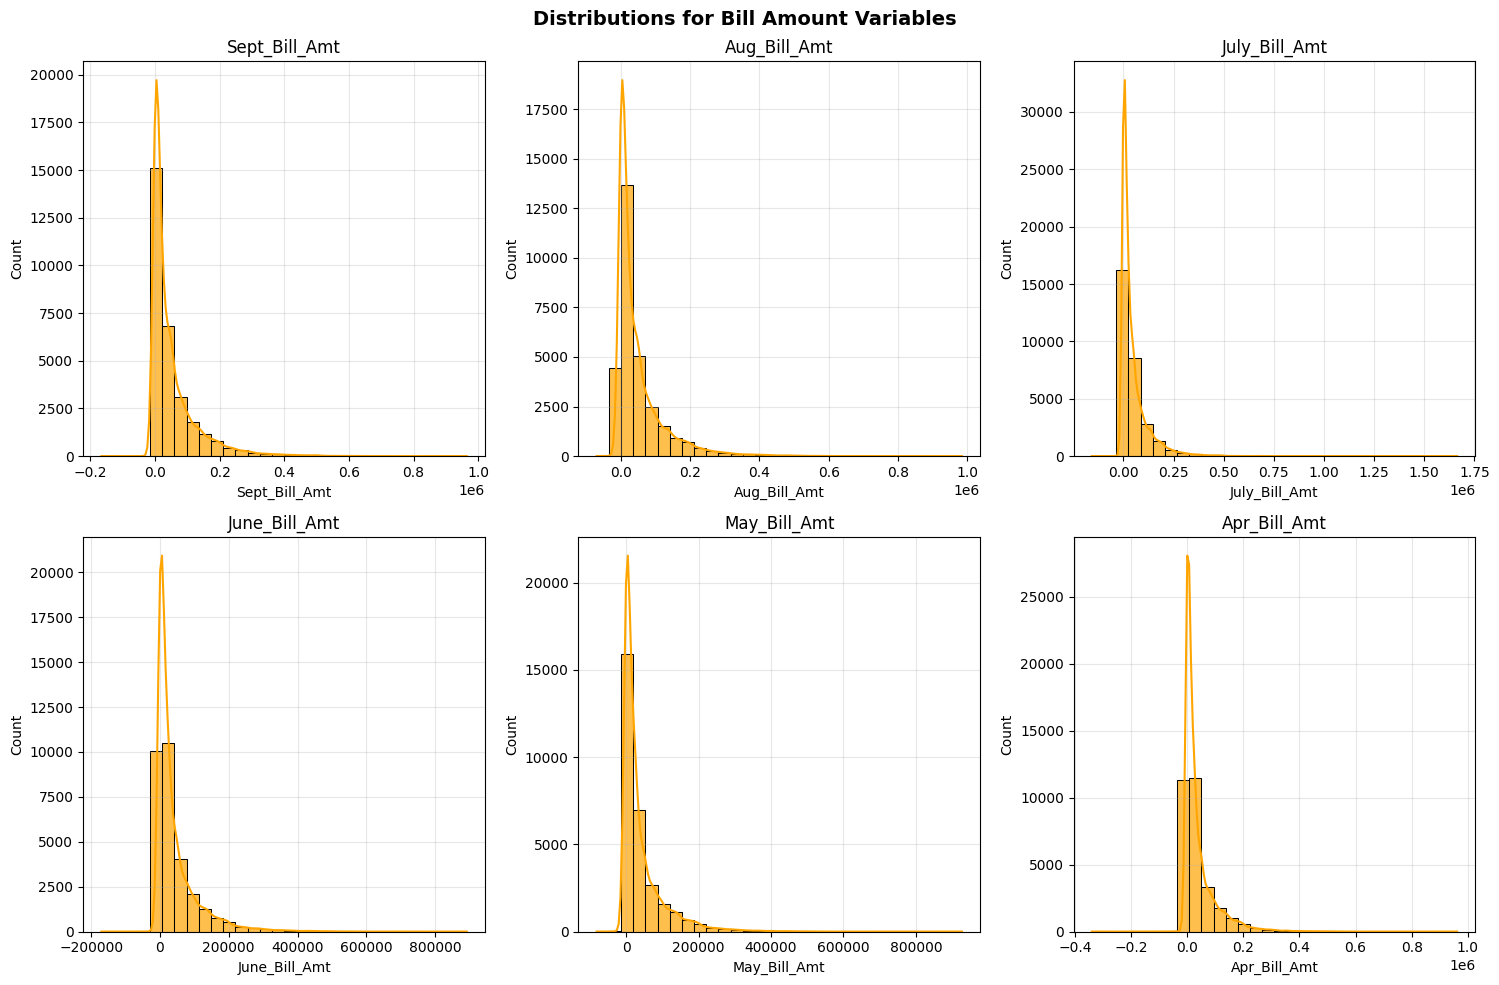

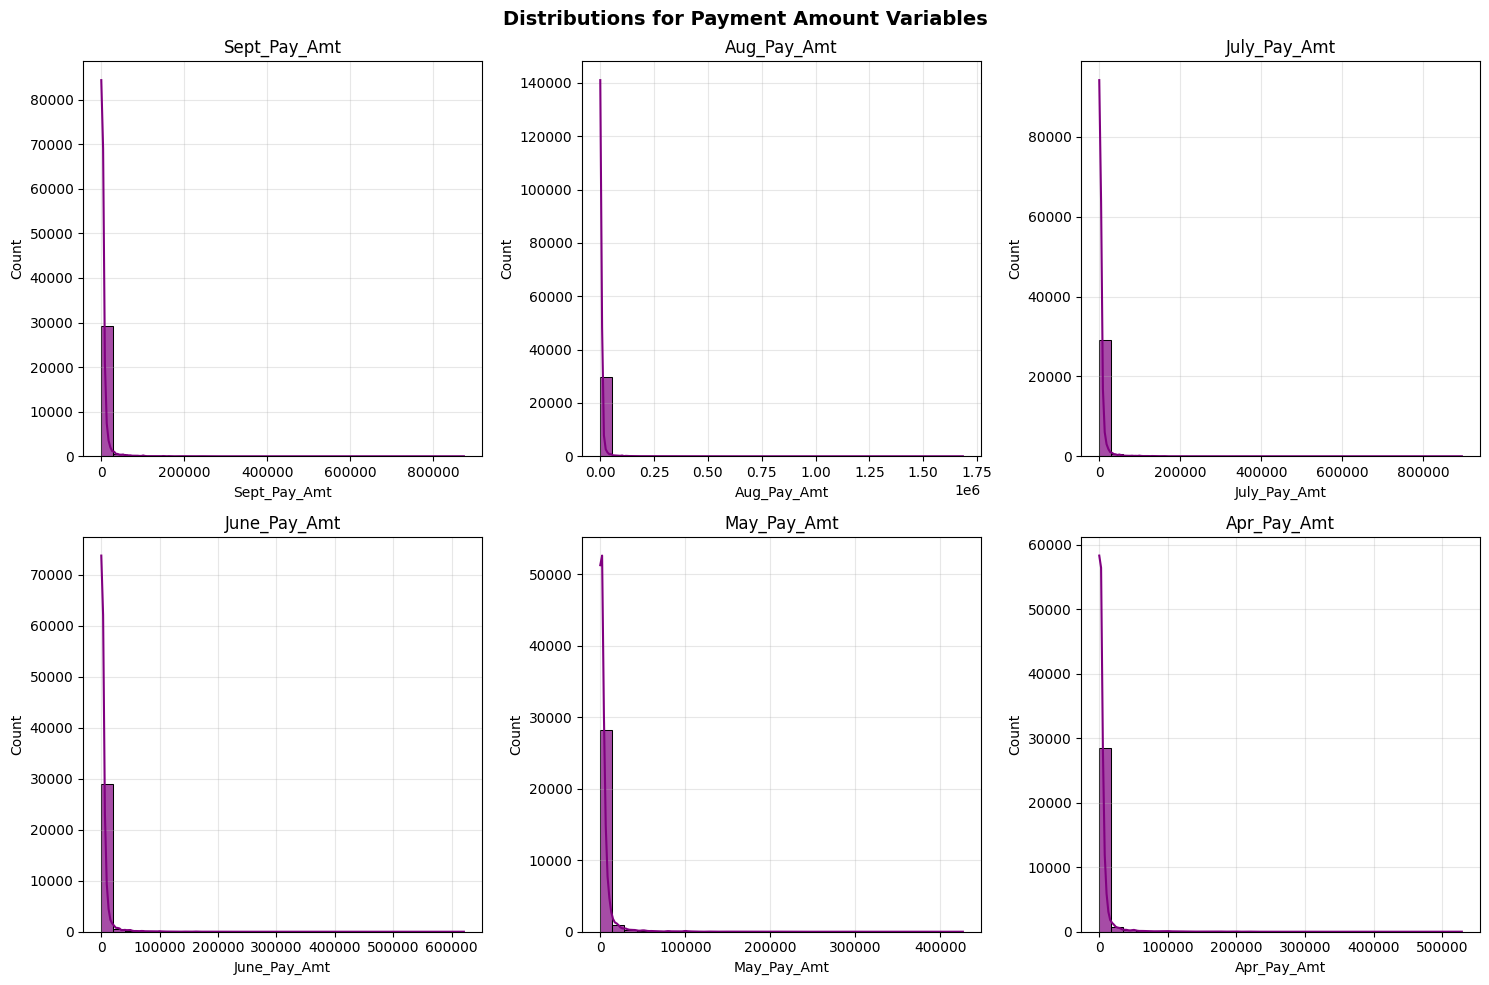

In [53]:
# Visualizing Distributions of Numerical Variables by categories

# Group variables for better analysis
credit_vars = ['Credit_Limit', 'Age']
bill_amt_columns = ['Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt', 'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt']
pay_amt_columns = ['Sept_Pay_Amt', 'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt', 'Apr_Pay_Amt']

# Credit-related variables
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('Distributions for Credit-Related Variables', fontsize=14, fontweight='bold')

for i, col in enumerate(credit_vars):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='green', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'histograms_of_credit_related_variables.png'))
plt.show()

# Bill amount variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions for Bill Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(bill_amt_columns):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='orange', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'histograms_of_bill_amounts.png'))
plt.show()

# Payment amount variables
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Distributions for Payment Amount Variables', fontsize=14, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(pay_amt_columns):
    sns.histplot(data=df, x=col, bins=30, kde=True, ax=axes[i], color='purple', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'histograms_of_payment_amounts.png'))
plt.show()

- **Credit Limit** is right-skewed, with a peak around 100,000–200,000 NTD and a long tail (outliers > 525,000).
- **Age** is roughly normal, centered around 25–40, with outliers > 60.
- **Bill Amounts** is Right-skewed, with negative values (overpayments) and high outliers.
- **Pay Amounts** is also Right-skewed, with peaks near 0 and outliers around > 10,000.

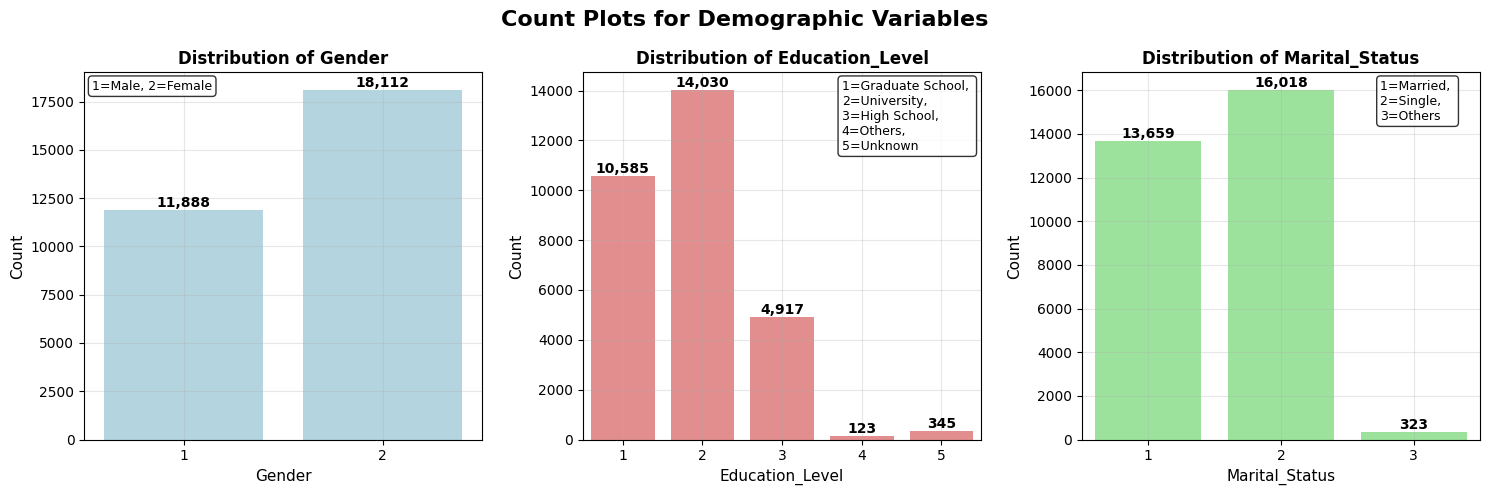

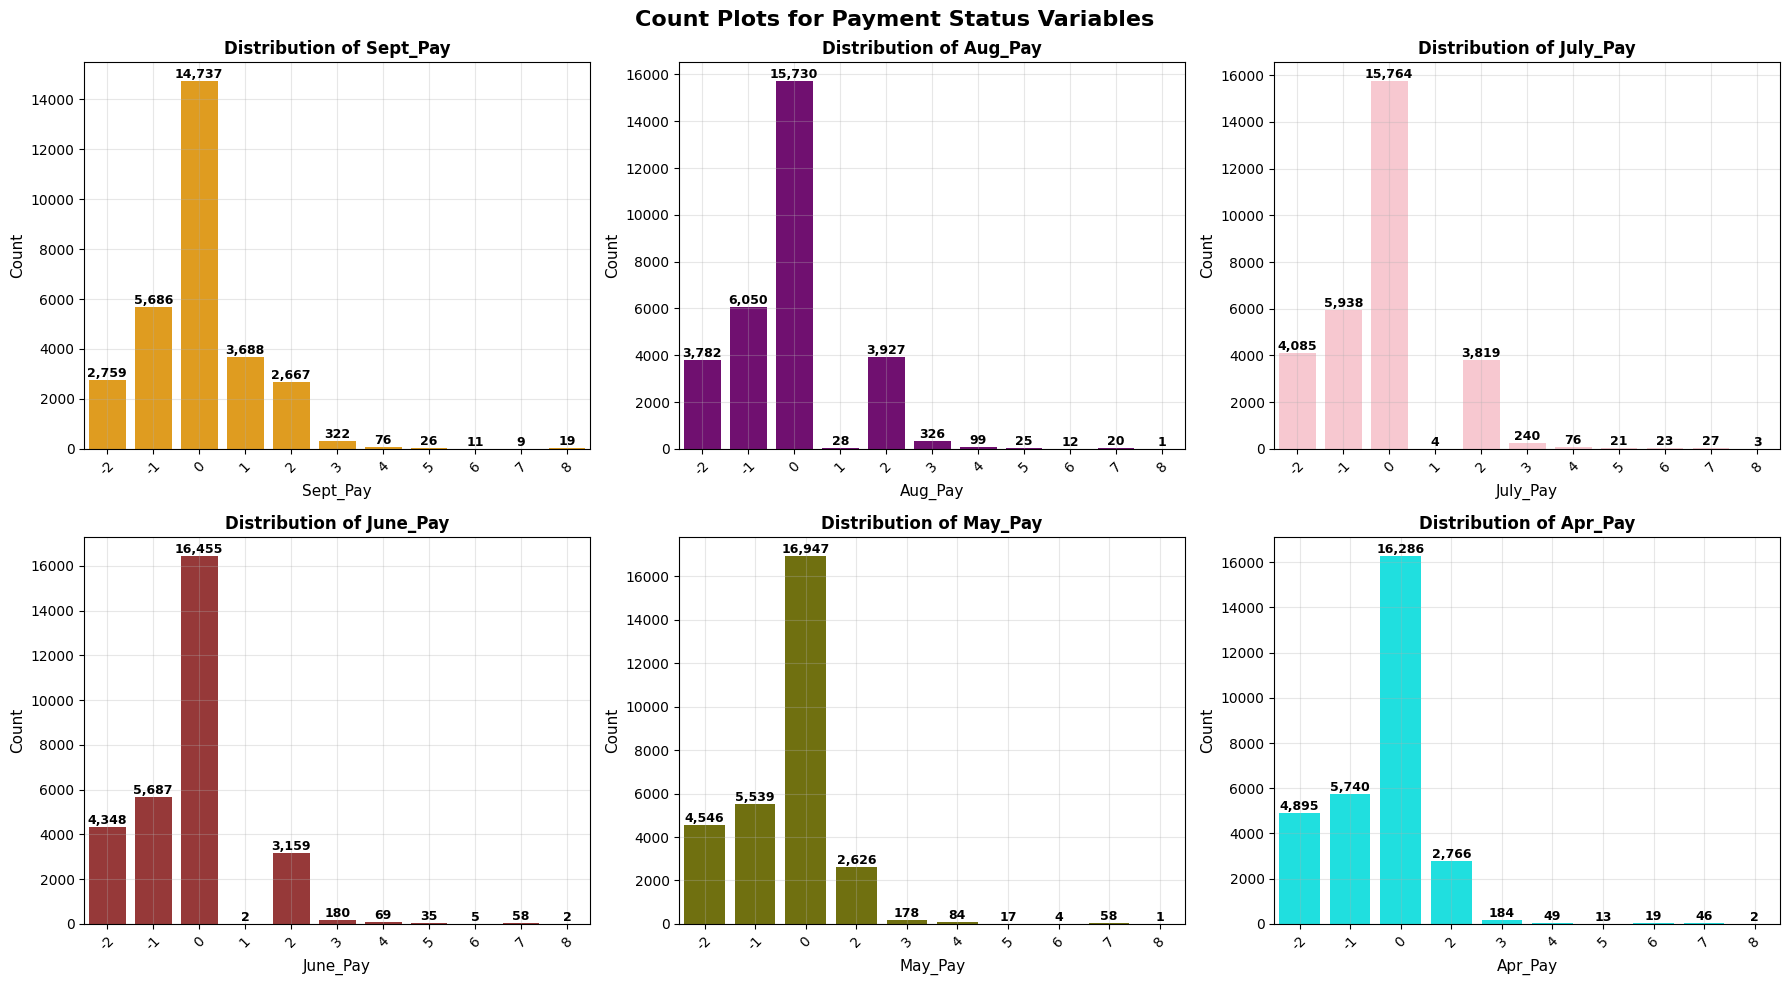

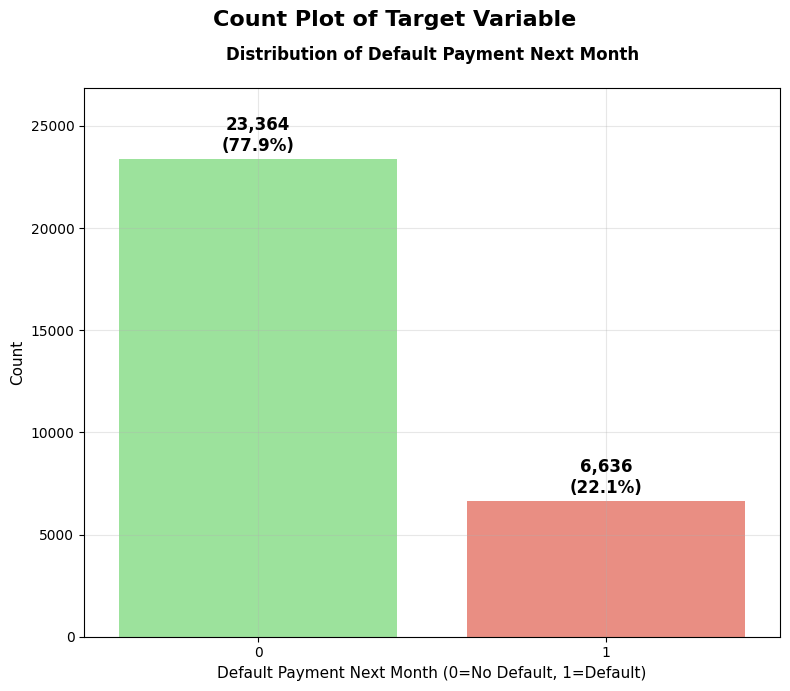

In [54]:
# Visualizing Distributions of Categorical Variables by groups

# Define the categorical variable groups
demographic_columns = ['Gender', 'Education_Level', 'Marital_Status']
payment_status_columns = ['Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'Apr_Pay']

# 1. Count plots for Demographic Variables
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('Count Plots for Demographic Variables', fontsize=16, fontweight='bold')

colors_demo = ['lightblue', 'lightcoral', 'lightgreen']

# Define information for each demographic variable
info_boxes = {
    'Gender': '1=Male, 2=Female',
    'Education_Level': '1=Graduate School, \n2=University,\n3=High School,\n4=Others,\n5=Unknown',
    'Marital_Status': '1=Married, \n2=Single, \n3=Others'
}

for i, col in enumerate(demographic_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color=colors_demo[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].grid(True, alpha=0.3)
    
    # Add count values on top of bars
    for p in axes[i].patches:
        height = int(p.get_height())
        axes[i].annotate(f'{height:,}', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # Add information box for each variable with custom positioning
    if col == 'Gender':
        # Keep Gender info box at top-left
        pos_x, pos_y = 0.02, 0.98
    elif col == 'Education_Level':
        # Education_Level info box to top-right
        pos_x, pos_y = 0.65, 0.98
    else:  # Marital_Status
        # Move Marital_Status info box further right in top-right corner
        pos_x, pos_y = 0.75, 0.98
        
    axes[i].text(pos_x, pos_y, info_boxes[col], 
                transform=axes[i].transAxes, 
                fontsize=9, 
                verticalalignment='top',
                bbox=dict(boxstyle="round,pad=0.3", facecolor='white', alpha=0.8, edgecolor='black'))

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'countplots_of_demographic_variables.png'))
plt.show()

# 2. Count plots for Payment Status Variables
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Count Plots for Payment Status Variables', fontsize=16, fontweight='bold')

# Flatten axes for easier iteration
axes = axes.flatten()
colors_payment = ['orange', 'purple', 'pink', 'brown', 'olive', 'cyan']

for i, col in enumerate(payment_status_columns):
    sns.countplot(data=df, x=col, ax=axes[i], color=colors_payment[i])
    axes[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(col, fontsize=11)
    axes[i].set_ylabel('Count', fontsize=11)
    axes[i].grid(True, alpha=0.3)
    
    # Rotate x-axis labels for better readability
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count values on top of bars
    for p in axes[i].patches:
        height = int(p.get_height())
        axes[i].annotate(f'{height:,}', 
                       (p.get_x() + p.get_width()/2., p.get_height()), 
                       ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'countplots_of_payment_status.png'))
plt.show()

# 3. Count plot for Target Variable
fig, ax = plt.subplots(1, 1, figsize=(8, 7))
fig.suptitle('Count Plot of Target Variable', fontsize=16, fontweight='bold')

sns.countplot(data=df, x=target_column, ax=ax, palette=['lightgreen', 'salmon'])
ax.set_title('Distribution of Default Payment Next Month', fontsize=12, fontweight='bold', pad=20)
ax.set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
ax.set_ylabel('Count', fontsize=11)
ax.grid(True, alpha=0.3)

# Add count values and percentages on top of bars
total_count = len(df)
for p in ax.patches:
    height = int(p.get_height())
    percentage = (height / total_count) * 100
    ax.annotate(f'{height:,}\n({percentage:.1f}%)', 
               (p.get_x() + p.get_width()/2., p.get_height() + 200), 
               ha='center', va='bottom', fontsize=12, fontweight='bold')

# Adjust y-axis limit to accommodate annotations
ax.set_ylim(0, max([p.get_height() for p in ax.patches]) * 1.15)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'countplot_of_target_variable.png'))
plt.show()

- **Demographic Variables:**
    - Around 60% of the credit card owners are females and around 40% are males, showing a gender imbalance.
    - Most credit card owners have university education level or graduate school.
    - Around 55% of credit card owners are single, followed by married (around 45%). A small percentage (around 1%) have undefined marital status.

- **Payment Status Variables (Sept_Pay to Apr_Pay):**
    - **SEPT_PAY**: Most clients pay on time (-1, 0). Payment delays of 1-2 months are common (1, 2).
    - **APR_PAY to AUG_PAY**: Similar patterns with most clients paying on time or having minimal delays. The presence of -2 values indicates "no consumption" periods.
    - Payment patterns are relatively consistent across months, with most of the clients are maintaining good payment behavior.
- **Target Variable:**
    - **Class Imbalance**: The dataset is imbalanced with 77.9% non-defaulters and 22.1% defaulters.
    - This imbalance reflects real-world credit data where defaults are less common but need accurate prediction.

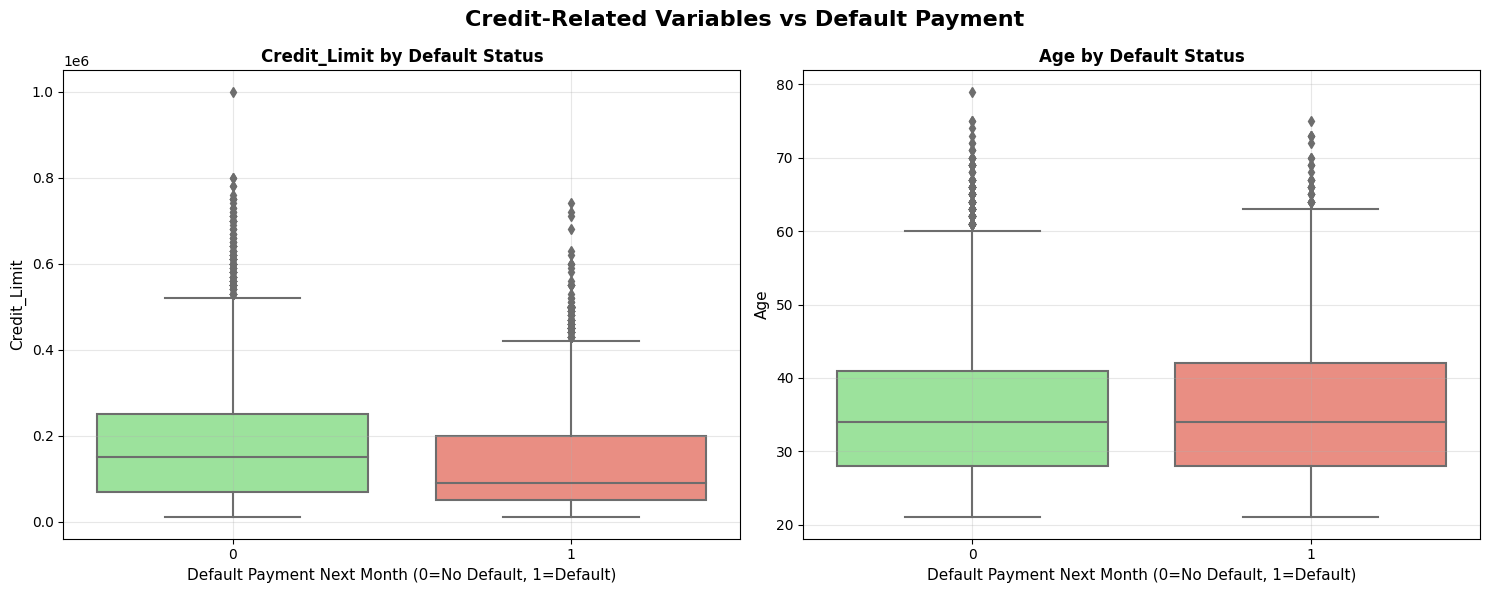

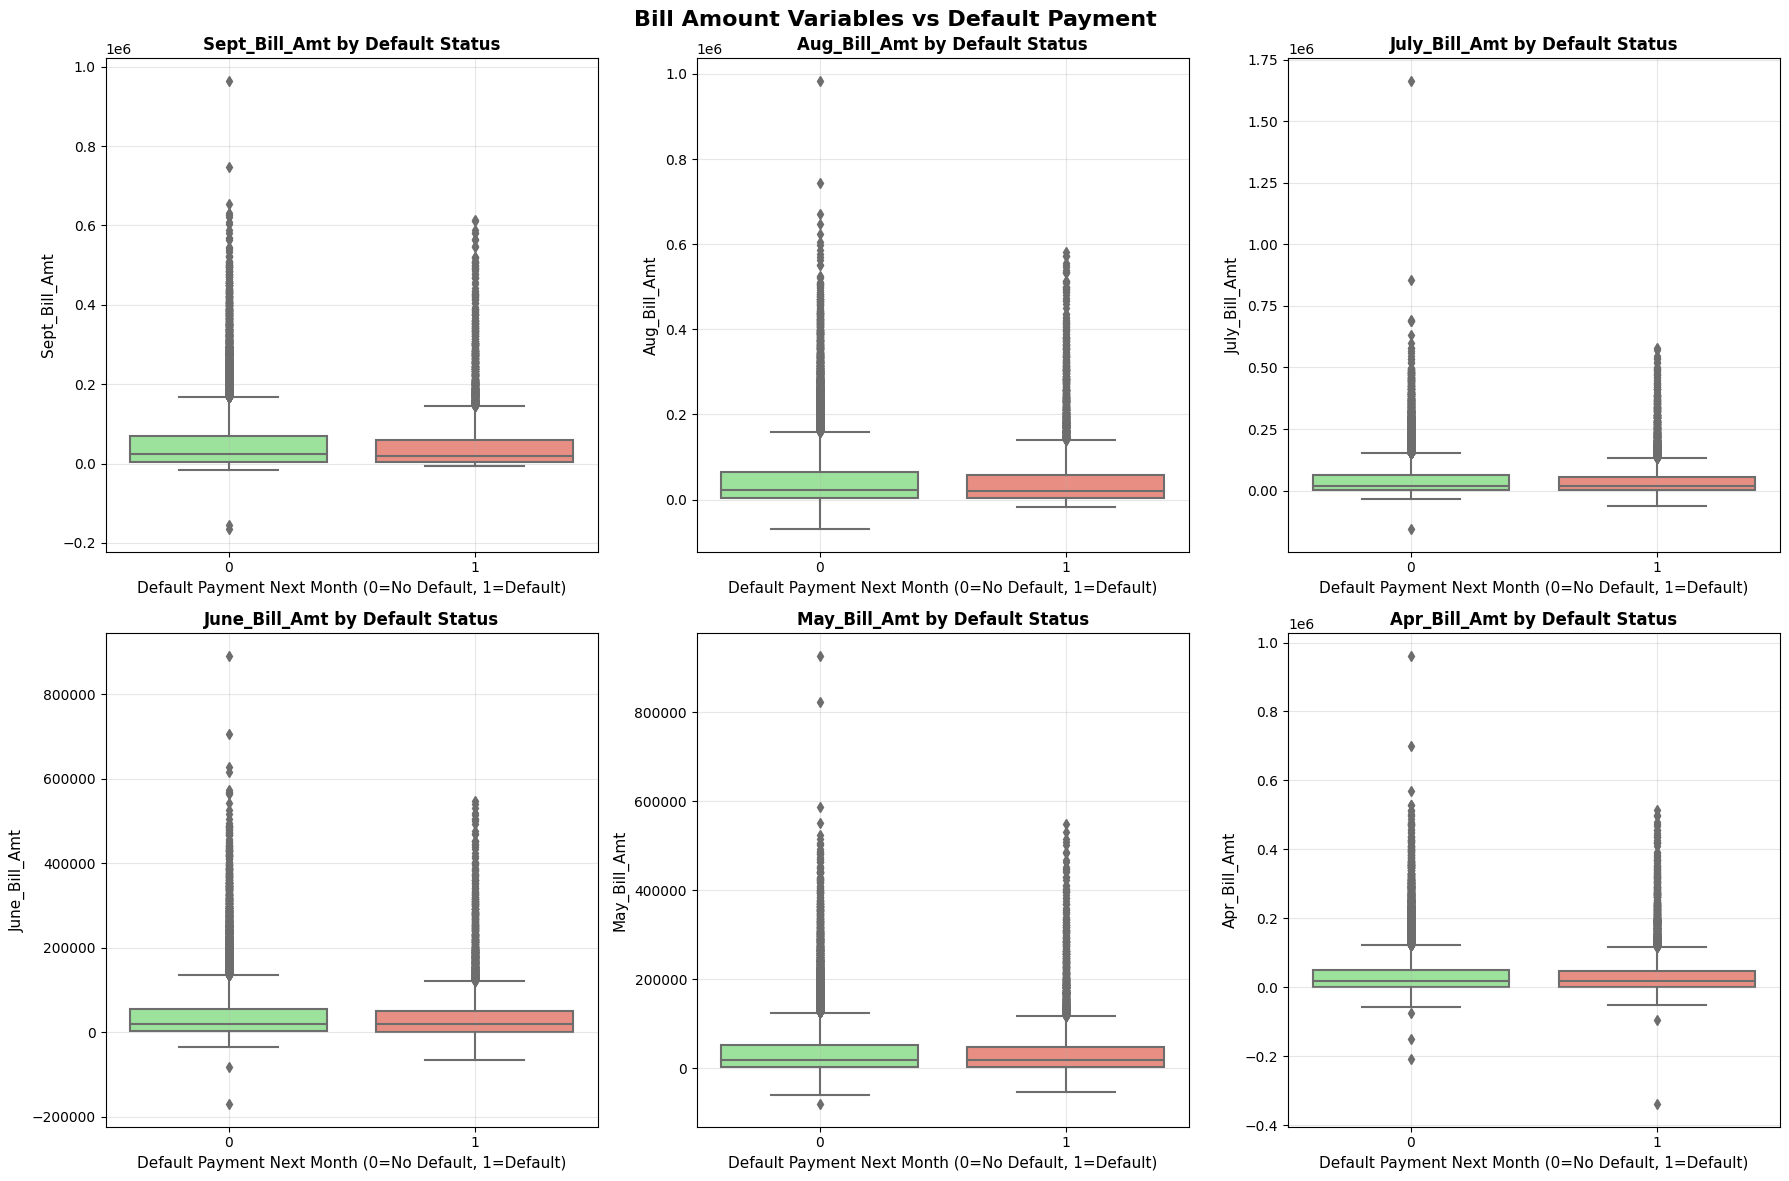

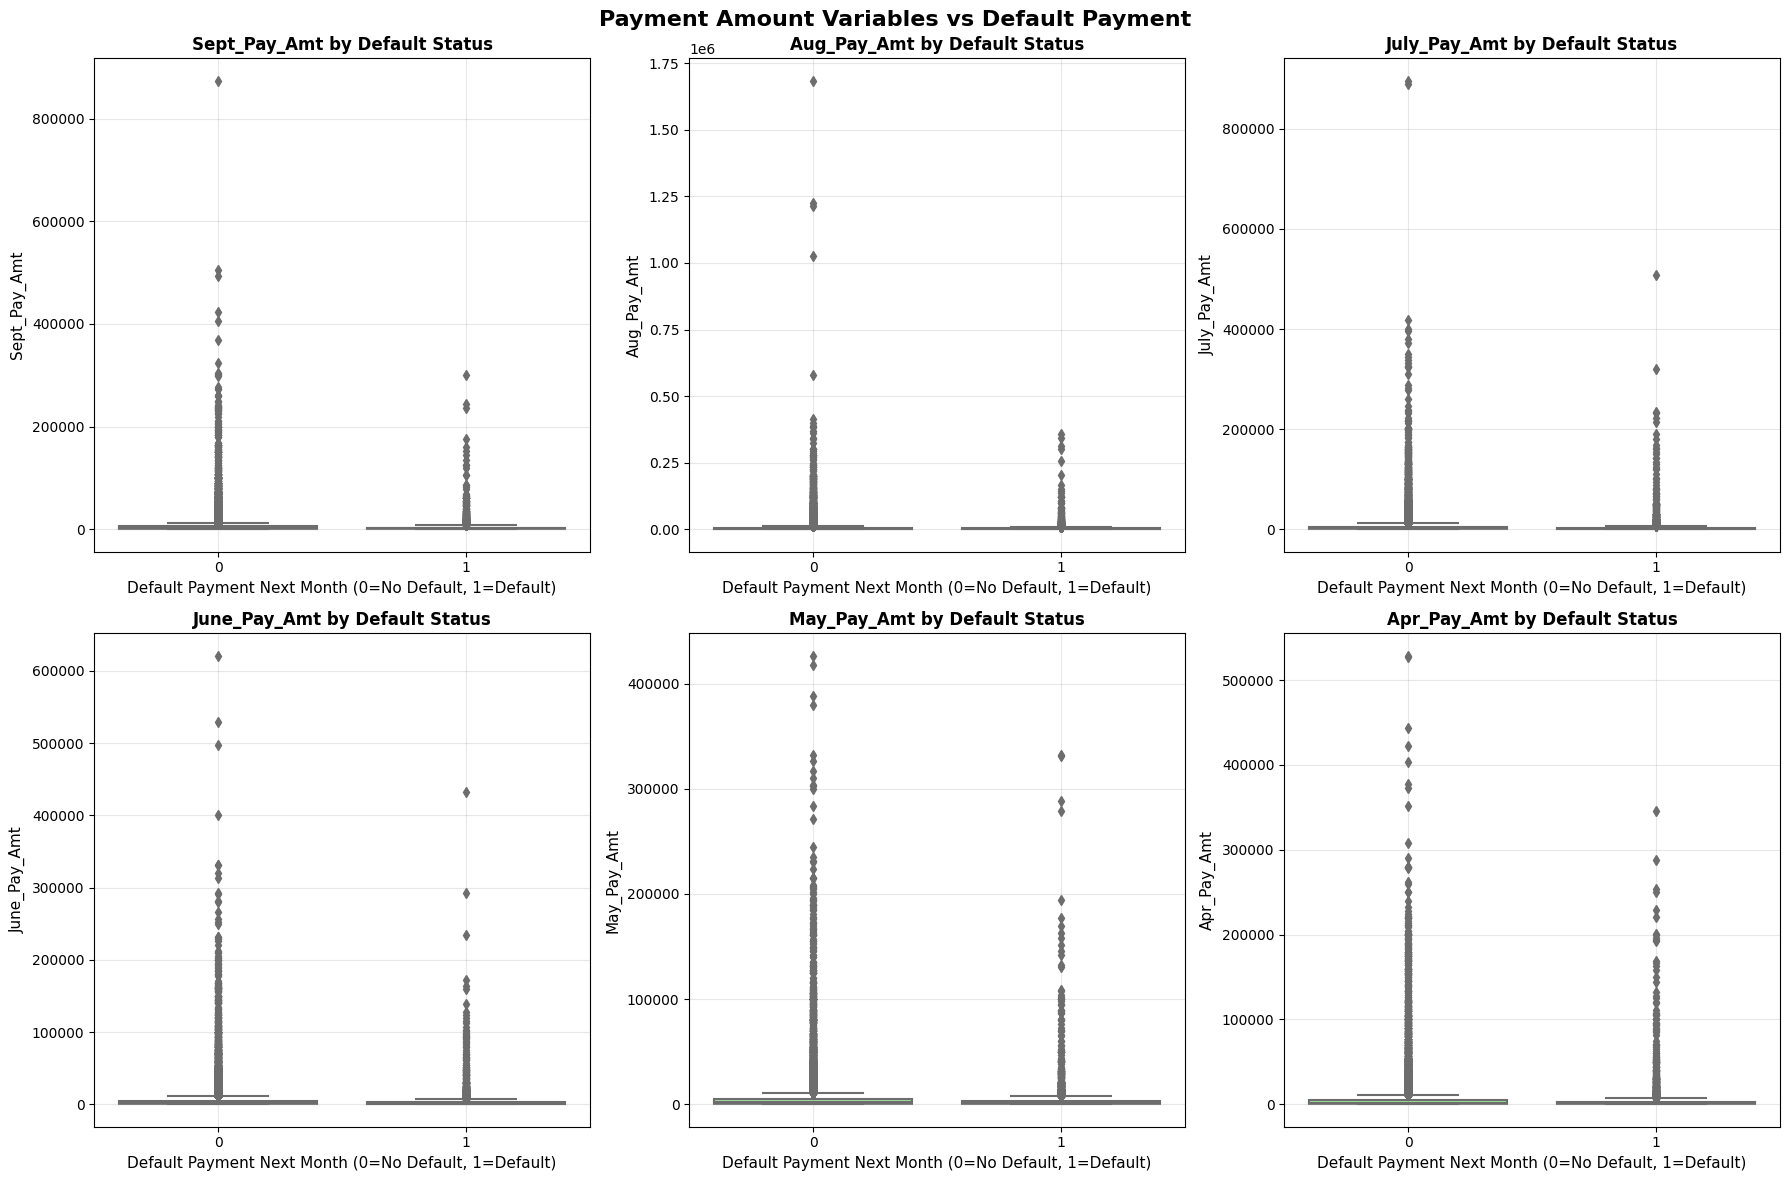

In [55]:
# Visualizing Relationships between Numerical Variables and Target Variable

# 1. Box Plots for Credit-Related Variables vs Default
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Credit-Related Variables vs Default Payment', fontsize=16, fontweight='bold')

for i, col in enumerate(credit_vars):
    sns.boxplot(data=df, x=target_column, y=col, ax=axes[i], palette=['lightgreen', 'salmon'])
    axes[i].set_title(f'{col} by Default Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
    axes[i].set_ylabel(col, fontsize=11)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'boxplots_of_credit_related_variables_by_default.png'))
plt.show()

# 2. Box Plots for Bill Amount Variables vs Default
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Bill Amount Variables vs Default Payment', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(bill_amt_columns):
    sns.boxplot(data=df, x=target_column, y=col, ax=axes[i], palette=['lightgreen', 'salmon'])
    axes[i].set_title(f'{col} by Default Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
    axes[i].set_ylabel(col, fontsize=11)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'boxplots_of_bill_amounts_by_default.png'))
plt.show()

# 3. Box Plots for Payment Amount Variables vs Default
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Payment Amount Variables vs Default Payment', fontsize=16, fontweight='bold')
axes = axes.flatten()

for i, col in enumerate(pay_amt_columns):
    sns.boxplot(data=df, x=target_column, y=col, ax=axes[i], palette=['lightgreen', 'salmon'])
    axes[i].set_title(f'{col} by Default Status', fontsize=12, fontweight='bold')
    axes[i].set_xlabel('Default Payment Next Month (0=No Default, 1=Default)', fontsize=11)
    axes[i].set_ylabel(col, fontsize=11)
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(os.path.join(visualization_outputs, 'boxplots_of_payment_amounts_by_default.png'))
plt.show()

- **Credit-Related Variables:**
    - Non-defaulters have higher median credit limits vs defaulters. Higher limits correlate with lower default risk.
    - There is minimal separation between Age groups. Age alone is not a strong predictor. We can create age groups to capture more meaningful patterns instead of using it as a continuous variable.
- **Bill Amount Variables (Sept_Bill_Amt to Apr_Bill_Amt):**
    - Defalulters have consistently shown lower median bill amounts across all months compared to non-defaulters.
    - Lower bills may indicate financial stress or reduced spending before default.
- **Payment Amount Variables (Sept_Pay_Amt to Sept_Pay_Amt):**
    - Defaulters have dramatically lower payment amounts across all months it can be a strong predictor of default risk.
    - Defaulters show a high frequency of zero/minimal payments, indicating financial distress.
    - Payment history can be the strongest predictor of default risk.

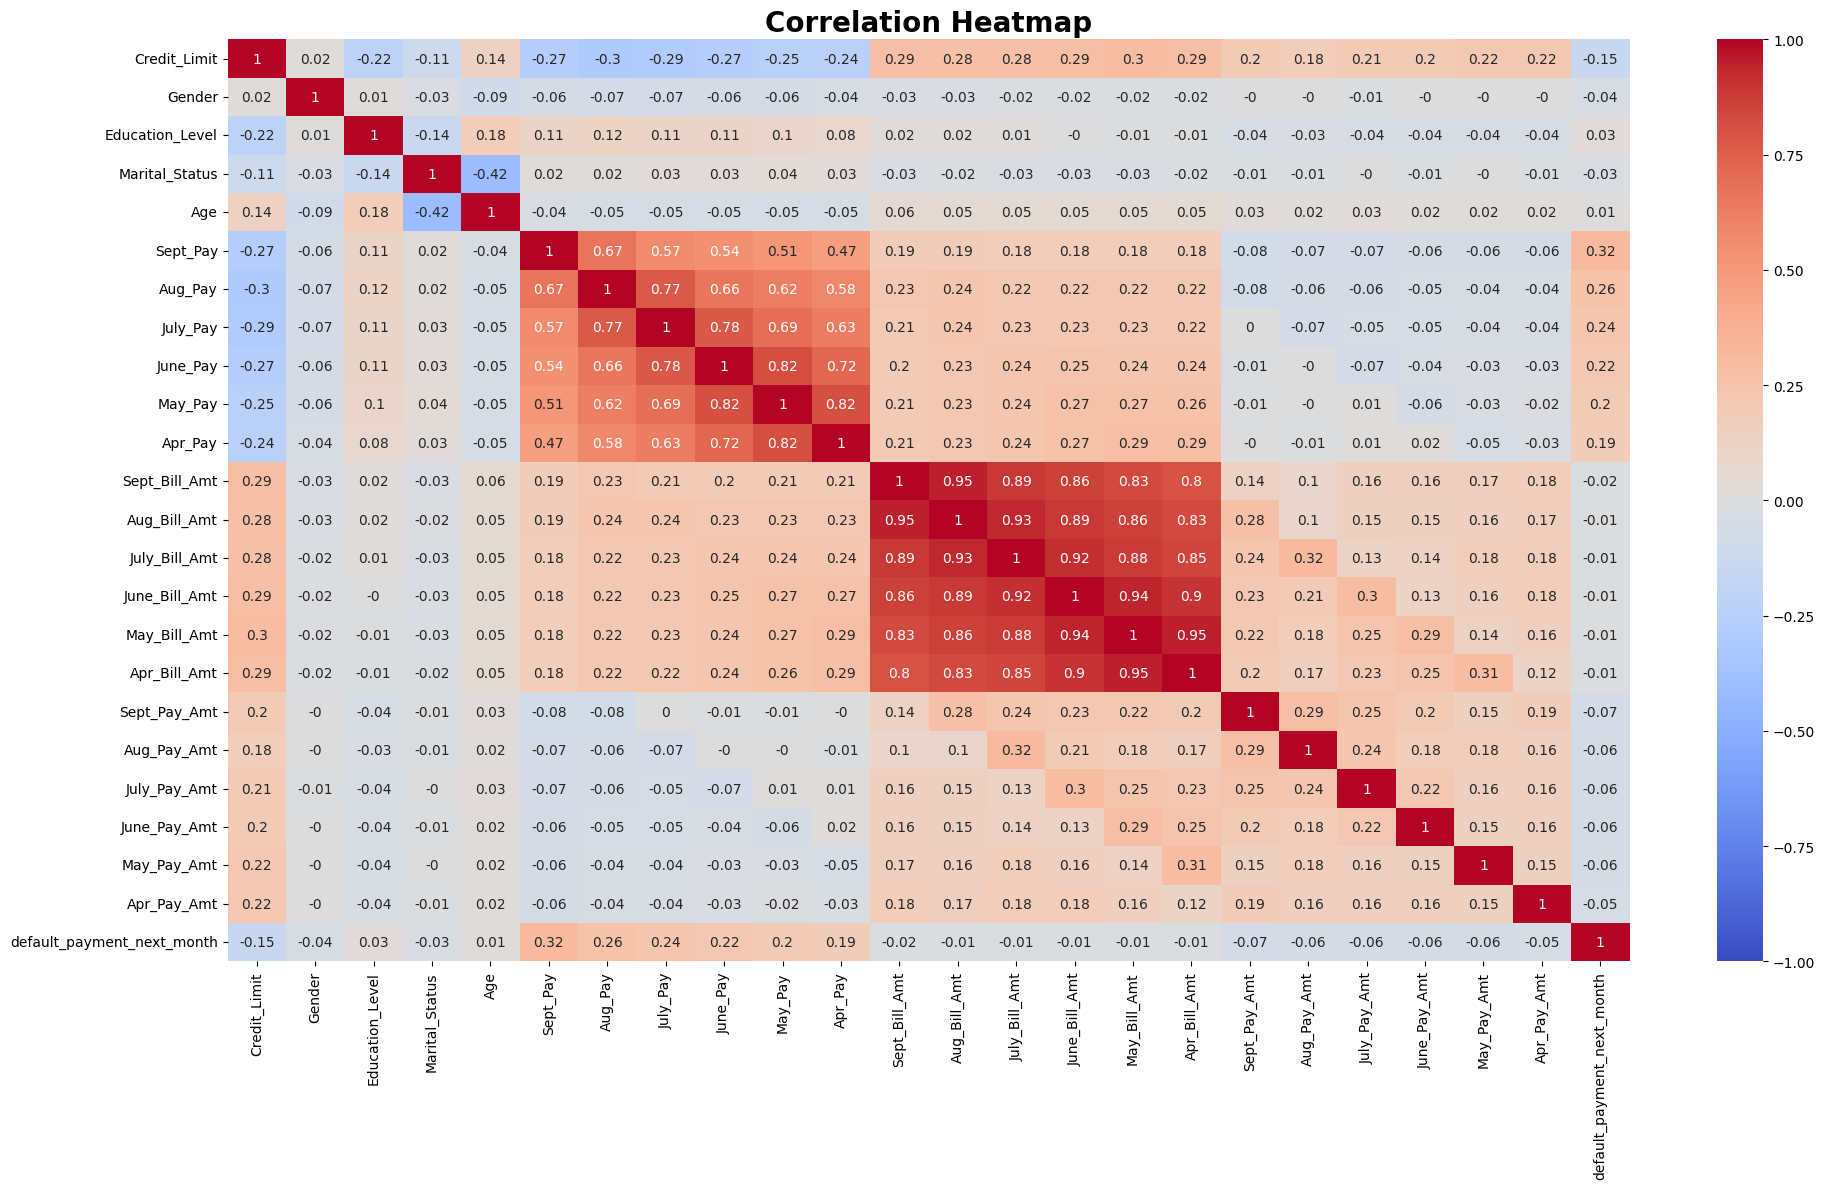

In [56]:
# Correlation Heatmap
plt.figure(figsize=(20, 12))
correlation_matrix = df.corr().round(2)
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, vmin=-1, vmax=1)
plt.title('Correlation Heatmap', fontsize=20, fontweight='bold')
plt.savefig(os.path.join(visualization_outputs, 'correlation_heatmap.png'))
plt.tight_layout()
plt.show()

- **Strong positive correlations** exist between bill amounts across different months (0.8-0.95), indicating consistent billing patterns.
- **Payment amounts** show moderate correlations (0.15-0.29), suggesting some consistency in payment behavior but more variability than bill amounts.
- **Credit_Limit** has weak correlations with most variables, making it an independent predictor.
- **Age** shows minimal correlations with financial variables, suggesting limited predictive power.
- **Payment status variables** (Sept_Pay to Apr_Pay) show weak to moderate correlations, indicating varied payment delay patterns.
- **Target variable** (default_payment_next_month) has weak correlations with most features, suggesting the need for advanced modeling techniques to capture complex relationships.

### **Key Insights from Data Visualization**
- **Distribution Patterns:**
    - All numerical variables show right-skewed distributions requiring log transformation for modeling or using tree based algorithms like Random Forest, Gradient Boosting or XGBoost as they can handle skewed distributions and outliers effectively, making them suitable for this dataset.
    - Credit_Limit and BILL_AMT variables have significant outliers (8-9%) but are valid business cases.
    - Payment amounts (PAY_AMT) show high zero-payment frequency, indicating varied payment behaviors.
- **Class Imbalance:**
    - Target variable shows 77.9% non-defaulters vs 22.1% defaulters, requiring resampling strategies.
    - Gender imbalance exists (around 60% female vs 40% male) but reflects natural customer demographics.
- **Feature Relationships:**
    - Strong correlations within bill amounts (0.6-0.9) suggest potential dimensionality reduction opportunities.
    - Payment amounts show moderate correlations (0.3-0.6), indicating more independent behavioral patterns.
    - Credit_Limit and Age are largely independent, providing unique information for modeling.
- **Action Items for Modeling:**
    - We can apply log transformation for skewed numerical variables or use a tree based models which are robust to skewed distributions and outliers.
    - To handle class imbalance, we can use techniques like SMOTE or undersampling.

# **4. Feature Engineering**

## **4.1 Creating New Features**
- We will create new features based on existing variables to enhance the model's predictive power.

In [57]:
# Loading the cleaned DataFrame and saving it to a new variable df1
df1 = pd.read_csv(cleaned_data_path)
df1.head()

,Credit_Limit,Gender,Education_Level,Marital_Status,Age,Sept_Pay,Aug_Pay,July_Pay,June_Pay,May_Pay,...,June_Bill_Amt,May_Bill_Amt,Apr_Bill_Amt,Sept_Pay_Amt,Aug_Pay_Amt,July_Pay_Amt,June_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,default_payment_next_month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [59]:
# Calculating average bill amount over 6 months
df1['Avg_Bill_Amt'] = df1[['Sept_Bill_Amt', 'Aug_Bill_Amt', 'July_Bill_Amt', 'June_Bill_Amt', 'May_Bill_Amt', 'Apr_Bill_Amt']].mean(axis=1).round(2)

# Calculating average payment amount over 6 months
df1['Avg_Pay_Amt'] = df1[['Sept_Pay_Amt', 'Aug_Pay_Amt', 'July_Pay_Amt', 'June_Pay_Amt', 'May_Pay_Amt', 'Apr_Pay_Amt']].mean(axis=1).round(2)

# Calculating payment-to-bill ratio (average payment / average bill, clipped to avoid division by zero)
df1['Pay_to_Bill_Ratio'] = np.where(df1['Avg_Bill_Amt'] != 0, df1['Avg_Pay_Amt'] / df1['Avg_Bill_Amt'], 0).round(2)

# Calculating average payment delay score (average of payment status)
df1['Avg_Delay_Score'] = df1[['Sept_Pay', 'Aug_Pay', 'July_Pay', 'June_Pay', 'May_Pay', 'Apr_Pay']].mean(axis=1).round(2)

# Calculating credit utilization ratio (average bill / credit limit)
df1['Credit_Utilization'] = np.where(df1['Credit_Limit'] != 0, df1['Avg_Bill_Amt'] / df1['Credit_Limit'], 0).round(2)

# Displaying random sample rows of new features created
new_features = ['Avg_Bill_Amt', 'Avg_Pay_Amt', 'Pay_to_Bill_Ratio', 'Avg_Delay_Score', 'Credit_Utilization']
df1[new_features].sample(10)

,Avg_Bill_Amt,Avg_Pay_Amt,Pay_to_Bill_Ratio,Avg_Delay_Score,Credit_Utilization
16624,78751.33,27861.50,0.35,0.33,0.19
5010,2720.00,0.00,0.00,-1.33,0.14
25565,78992.33,3383.33,0.04,0.00,0.99
22232,155181.17,6616.67,0.04,0.00,0.78
24502,49462.00,1833.33,0.04,1.83,0.99
15641,189603.17,38989.83,0.21,-0.17,0.76
16917,265184.67,67666.67,0.26,0.00,0.76
26107,74427.67,14592.17,0.20,0.00,0.47
16498,29448.00,1229.83,0.04,0.33,0.59
972,12906.67,1451.67,0.11,1.67,0.07


In [62]:
# Displaying the first few rows of the updated DataFrame with new features
df1.head()

,Credit_Limit,Gender,Education_Level,Marital_Status,Age,Sept_Pay,Aug_Pay,July_Pay,June_Pay,May_Pay,...,July_Pay_Amt,June_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Avg_Bill_Amt,Avg_Pay_Amt,Pay_to_Bill_Ratio,Avg_Delay_Score,Credit_Utilization,default_payment_next_month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,1284.00,114.83,0.09,-0.33,0.06,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.0,1000.0,0.0,2000.0,2846.17,833.33,0.29,0.50,0.02,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,16942.17,1836.33,0.11,0.00,0.19,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,38555.67,1398.00,0.04,0.00,0.77,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,10000.0,9000.0,689.0,679.0,18223.17,9841.50,0.54,-0.33,0.36,0


In [ ]:
# Moving default_payment_next_month column to the last position for better clarity in analysis
cols = [col for col in df1.columns if col != 'default_payment_next_month']
cols.append('default_payment_next_month')
df1 = df1[cols]

# Display the DataFrame to confirm the change
df1.head()

,Credit_Limit,Gender,Education_Level,Marital_Status,Age,Sept_Pay,Aug_Pay,July_Pay,June_Pay,May_Pay,...,July_Pay_Amt,June_Pay_Amt,May_Pay_Amt,Apr_Pay_Amt,Avg_Bill_Amt,Avg_Pay_Amt,Pay_to_Bill_Ratio,Avg_Delay_Score,Credit_Utilization,default_payment_next_month
0,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,1284.00,114.83,0.09,-0.33,0.06,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,1000.0,1000.0,0.0,2000.0,2846.17,833.33,0.29,0.50,0.02,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,1000.0,1000.0,1000.0,5000.0,16942.17,1836.33,0.11,0.00,0.19,0
3,50000.0,2,2,1,37,0,0,0,0,0,...,1200.0,1100.0,1069.0,1000.0,38555.67,1398.00,0.04,0.00,0.77,0
4,50000.0,1,2,1,57,-1,0,-1,0,0,...,10000.0,9000.0,689.0,679.0,18223.17,9841.50,0.54,-0.33,0.36,0
